In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/americancitizenincome/income.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('/kaggle/input/americancitizenincome/income.csv')

In [5]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,40,Self-emp-not-inc,223881,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,70,United-States,>50K
1,30,Private,149118,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Female,0,0,40,United-States,<=50K
2,46,Private,109209,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K
3,32,Private,229566,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,White,Male,0,0,60,United-States,>50K
4,54,?,148657,Preschool,1,Married-civ-spouse,?,Wife,White,Female,0,0,40,Mexico,<=50K


In [6]:
data.shape

(25000, 15)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             25000 non-null  int64 
 1   workclass       25000 non-null  object
 2   fnlwgt          25000 non-null  int64 
 3   education       25000 non-null  object
 4   education.num   25000 non-null  int64 
 5   marital.status  25000 non-null  object
 6   occupation      25000 non-null  object
 7   relationship    25000 non-null  object
 8   race            25000 non-null  object
 9   sex             25000 non-null  object
 10  capital.gain    25000 non-null  int64 
 11  capital.loss    25000 non-null  int64 
 12  hours.per.week  25000 non-null  int64 
 13  native.country  25000 non-null  object
 14  income          25000 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.9+ MB


In [8]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,25000.00000,2.500000e+04,25000.000000,25000.000000,25000.000000,25000.000000
mean,38.60916,1.896611e+05,10.076320,1083.144040,87.489800,40.442800
std,13.68660,1.054713e+05,2.576967,7321.971568,402.830246,12.309706
min,17.00000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.00000,1.179830e+05,9.000000,0.000000,0.000000,40.000000
50%,37.00000,1.782110e+05,10.000000,0.000000,0.000000,40.000000
75%,48.00000,2.370682e+05,12.000000,0.000000,0.000000,45.000000
max,90.00000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
data['workclass'].value_counts()

workclass
Private             17471
Self-emp-not-inc     1935
Local-gov            1553
?                    1429
State-gov            1004
Self-emp-inc          851
Federal-gov           740
Without-pay            12
Never-worked            5
Name: count, dtype: int64

In [10]:
data['workclass'] = data['workclass'].replace('?','unknown')

In [11]:
data = pd.get_dummies(data, columns=['workclass'], prefix = 'workclass', dtype = int)
data.head()

,age,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,...,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,workclass_unknown
0,40,223881,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,...,>50K,0,0,0,0,0,1,0,0,0
1,30,149118,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Female,0,...,<=50K,0,0,0,1,0,0,0,0,0
2,46,109209,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,...,>50K,0,0,0,1,0,0,0,0,0
3,32,229566,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,White,Male,0,...,>50K,0,0,0,1,0,0,0,0,0
4,54,148657,Preschool,1,Married-civ-spouse,?,Wife,White,Female,0,...,<=50K,0,0,0,0,0,0,0,0,1


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   age                         25000 non-null  int64 
 1   fnlwgt                      25000 non-null  int64 
 2   education                   25000 non-null  object
 3   education.num               25000 non-null  int64 
 4   marital.status              25000 non-null  object
 5   occupation                  25000 non-null  object
 6   relationship                25000 non-null  object
 7   race                        25000 non-null  object
 8   sex                         25000 non-null  object
 9   capital.gain                25000 non-null  int64 
 10  capital.loss                25000 non-null  int64 
 11  hours.per.week              25000 non-null  int64 
 12  native.country              25000 non-null  object
 13  income                      25000 non-null  ob

In [13]:
category = ['marital.status','occupation','relationship','race','sex','native.country','income']
for i in category:
    print(f"Values count for {i}")
    print(data[i].value_counts())
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

Values count for marital.status
marital.status
Married-civ-spouse       11518
Never-married             8204
Divorced                  3390
Separated                  792
Widowed                    766
Married-spouse-absent      312
Married-AF-spouse           18
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Values count for occupation
occupation
Prof-specialty       3198
Craft-repair         3132
Exec-managerial      3114
Adm-clerical         2884
Sales                2812
Other-service        2524
Machine-op-inspct    1535
?                    1434
Transport-moving     1202
Handlers-cleaners    1076
Farming-fishing       770
Tech-support          714
Protective-serv       490
Priv-house-serv       109
Armed-Forces            6
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Values count for relationship
relationship
Husband           10146
Not-in-family      6345
Own-child          3897
Unmarried          2661
Wife               120

In [14]:
data['occupation'] = data['occupation'].replace('?','unknown')
data['native.country'] = data['native.country'].replace('?','unknown')

In [15]:
encoding_category = ['education', 'marital.status', 'occupation', 'sex', 'relationship', 'race']

for i in encoding_category:
    data = pd.get_dummies(data, columns=[i], prefix=i, dtype=int)
    print(f"Encoded column: {i}")
    print(data.filter(like=f"{i}_").head())  
    print("--------------------------------------------------")


Encoded column: education
   education_10th  education_11th  education_12th  education_1st-4th  \
0               0               0               0                  0   
1               0               0               0                  0   
2               0               0               0                  0   
3               0               0               0                  0   
4               0               0               0                  0   

   education_5th-6th  education_7th-8th  education_9th  education_Assoc-acdm  \
0                  0                  0              0                     0   
1                  0                  0              0                     0   
2                  0                  0              0                     0   
3                  0                  0              0                     0   
4                  0                  0              0                     0   

   education_Assoc-voc  education_Bachelors  education_Docto

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 68 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   age                                   25000 non-null  int64 
 1   fnlwgt                                25000 non-null  int64 
 2   education.num                         25000 non-null  int64 
 3   capital.gain                          25000 non-null  int64 
 4   capital.loss                          25000 non-null  int64 
 5   hours.per.week                        25000 non-null  int64 
 6   native.country                        25000 non-null  object
 7   income                                25000 non-null  object
 8   workclass_Federal-gov                 25000 non-null  int64 
 9   workclass_Local-gov                   25000 non-null  int64 
 10  workclass_Never-worked                25000 non-null  int64 
 11  workclass_Private           

In [17]:
freq = data['native.country'].value_counts().to_dict()
data['country_encoded'] = data['native.country'].map(freq)

In [18]:
data.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,native.country,income,workclass_Federal-gov,workclass_Local-gov,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,country_encoded
0,40,223881,15,99999,0,70,United-States,>50K,0,0,...,0,0,0,0,0,0,0,0,1,22415
1,30,149118,9,0,0,40,United-States,<=50K,0,0,...,0,0,0,0,0,0,0,0,1,22415
2,46,109209,10,0,0,40,United-States,>50K,0,0,...,0,0,0,0,0,0,0,0,1,22415
3,32,229566,11,0,0,60,United-States,>50K,0,0,...,0,0,0,0,0,0,0,0,1,22415
4,54,148657,1,0,0,40,Mexico,<=50K,0,0,...,0,0,0,1,0,0,0,0,1,502


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 69 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   age                                   25000 non-null  int64 
 1   fnlwgt                                25000 non-null  int64 
 2   education.num                         25000 non-null  int64 
 3   capital.gain                          25000 non-null  int64 
 4   capital.loss                          25000 non-null  int64 
 5   hours.per.week                        25000 non-null  int64 
 6   native.country                        25000 non-null  object
 7   income                                25000 non-null  object
 8   workclass_Federal-gov                 25000 non-null  int64 
 9   workclass_Local-gov                   25000 non-null  int64 
 10  workclass_Never-worked                25000 non-null  int64 
 11  workclass_Private           

In [20]:
data.drop(columns=['native.country'], inplace=True)

In [21]:
data.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,country_encoded
0,40,223881,15,99999,0,70,>50K,0,0,0,...,0,0,0,0,0,0,0,0,1,22415
1,30,149118,9,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,0,1,22415
2,46,109209,10,0,0,40,>50K,0,0,0,...,0,0,0,0,0,0,0,0,1,22415
3,32,229566,11,0,0,60,>50K,0,0,0,...,0,0,0,0,0,0,0,0,1,22415
4,54,148657,1,0,0,40,<=50K,0,0,0,...,0,0,0,1,0,0,0,0,1,502


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 68 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   age                                   25000 non-null  int64 
 1   fnlwgt                                25000 non-null  int64 
 2   education.num                         25000 non-null  int64 
 3   capital.gain                          25000 non-null  int64 
 4   capital.loss                          25000 non-null  int64 
 5   hours.per.week                        25000 non-null  int64 
 6   income                                25000 non-null  object
 7   workclass_Federal-gov                 25000 non-null  int64 
 8   workclass_Local-gov                   25000 non-null  int64 
 9   workclass_Never-worked                25000 non-null  int64 
 10  workclass_Private                     25000 non-null  int64 
 11  workclass_Self-emp-inc      

In [23]:
data['income'] = data['income'].map({'>50K':0, '<=50K':1})

In [24]:
data['income'].head()

0    0
1    1
2    0
3    0
4    1
Name: income, dtype: int64

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 68 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   age                                   25000 non-null  int64
 1   fnlwgt                                25000 non-null  int64
 2   education.num                         25000 non-null  int64
 3   capital.gain                          25000 non-null  int64
 4   capital.loss                          25000 non-null  int64
 5   hours.per.week                        25000 non-null  int64
 6   income                                25000 non-null  int64
 7   workclass_Federal-gov                 25000 non-null  int64
 8   workclass_Local-gov                   25000 non-null  int64
 9   workclass_Never-worked                25000 non-null  int64
 10  workclass_Private                     25000 non-null  int64
 11  workclass_Self-emp-inc                250

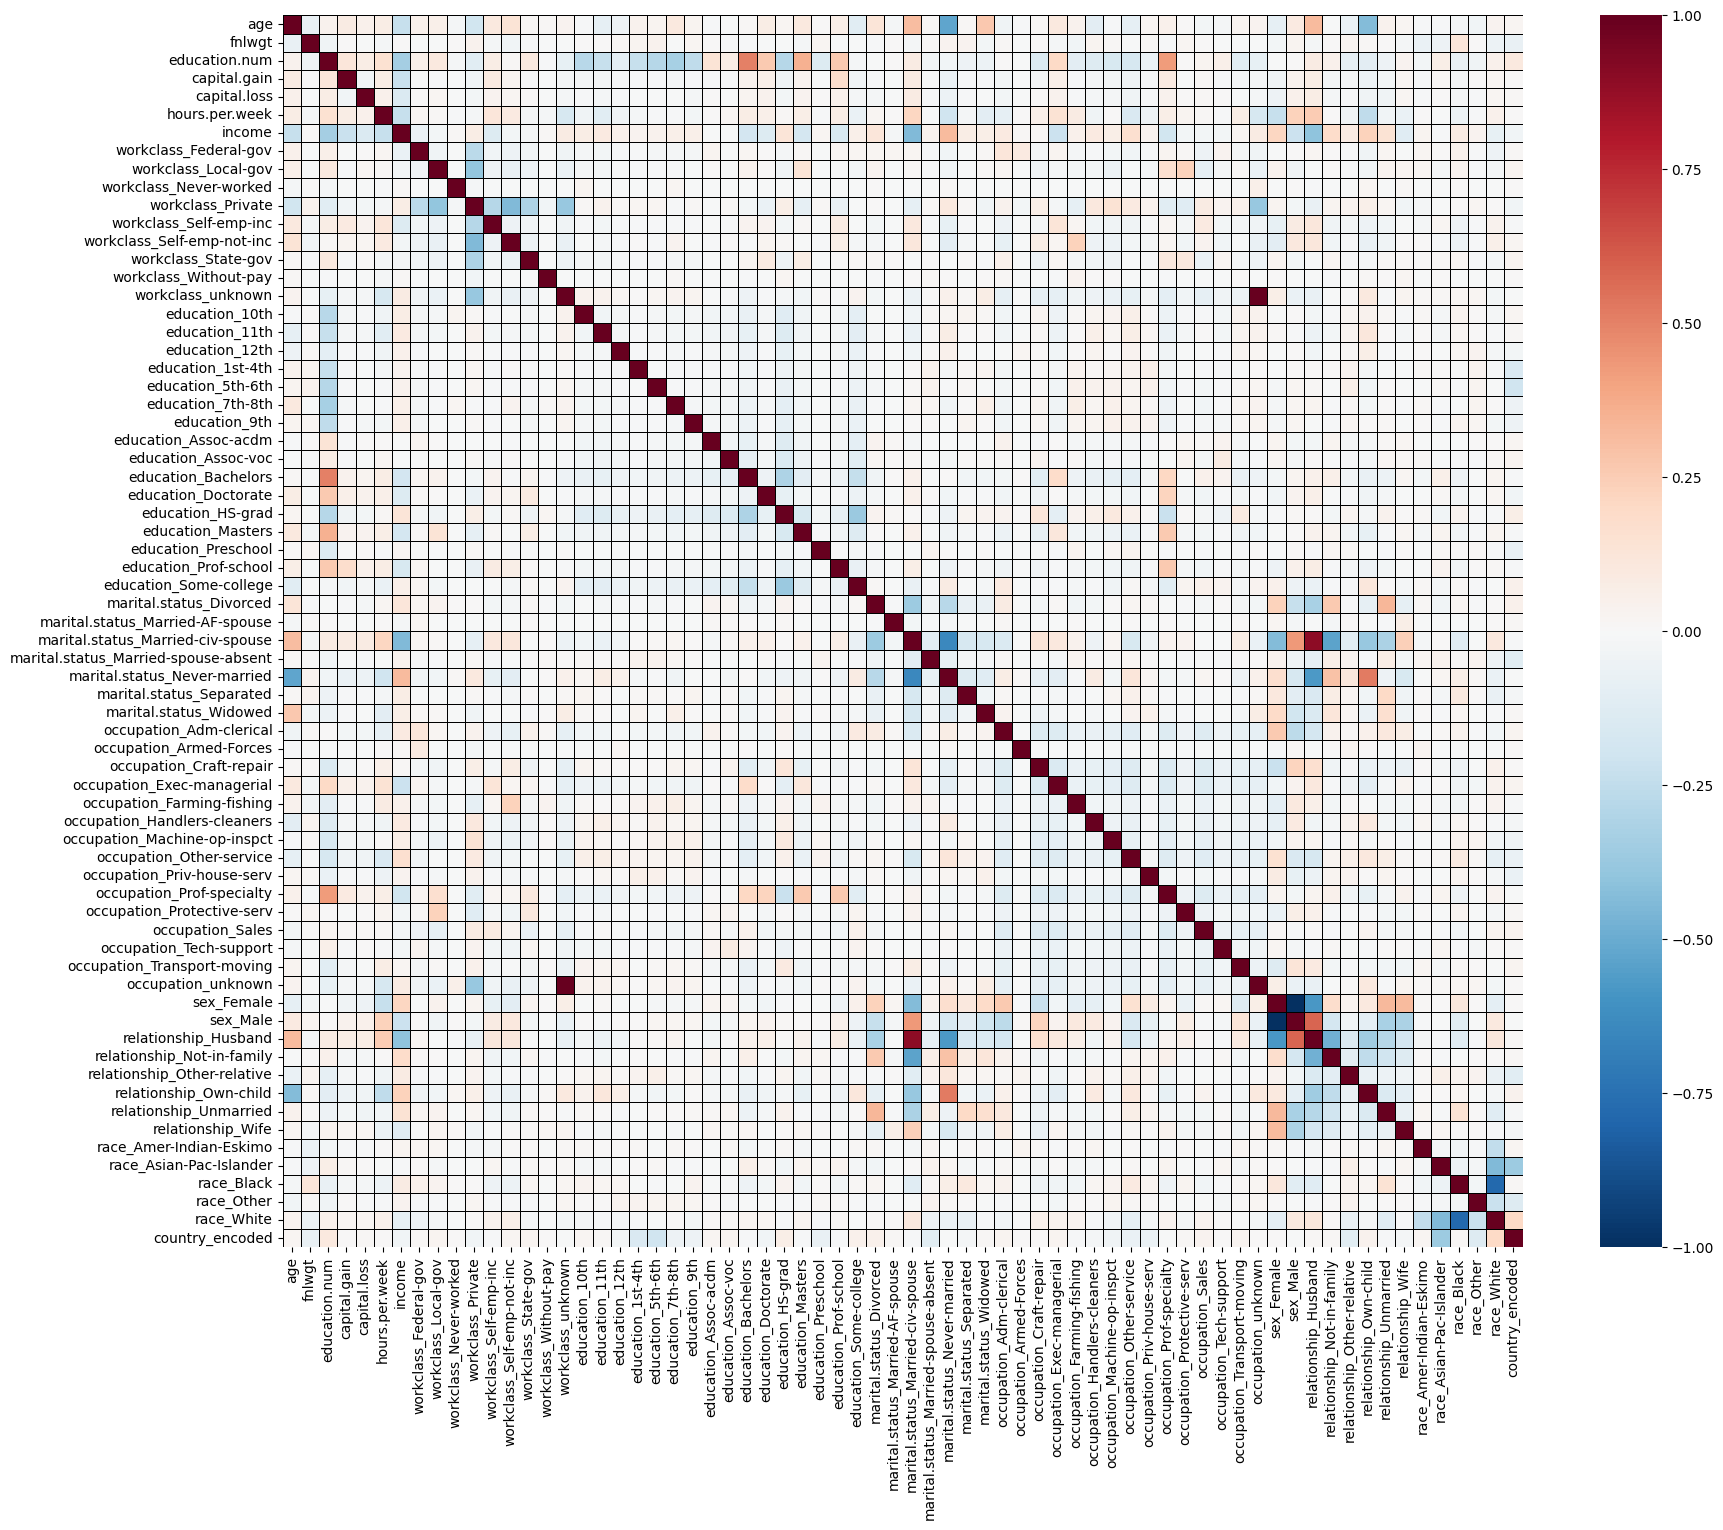

In [26]:
plt.figure(figsize=(20,16))
corr = data.corr()
sns.heatmap(corr, fmt='.2f', cmap='RdBu_r', linecolor='black',linewidths=0.5)
plt.show()

In [27]:
print(corr)

                              age    fnlwgt  education.num  capital.gain  \
age                      1.000000 -0.072013       0.039921      0.078954   
fnlwgt                  -0.072013  1.000000      -0.044136      0.002188   
education.num            0.039921 -0.044136       1.000000      0.123863   
capital.gain             0.078954  0.002188       0.123863      1.000000   
capital.loss             0.053195 -0.005649       0.073813     -0.032130   
...                           ...       ...            ...           ...   
race_Asian-Pac-Islander -0.013986 -0.052470       0.065041      0.011141   
race_Black              -0.018524  0.119392      -0.076920     -0.023158   
race_Other              -0.037438  0.003754      -0.039714      0.000843   
race_White               0.035055 -0.056603       0.050702      0.015795   
country_encoded          0.018868 -0.072294       0.098517      0.004761   

                         capital.loss  hours.per.week    income  \
age                 

In [28]:
feature = data.drop(columns='income')
target = data['income']

In [29]:
feature.shape

(25000, 67)

In [30]:
target.shape

(25000,)

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(feature, target, random_state=0, test_size=0.2) 

In [32]:
print(feature.shape, x_train.shape, x_test.shape)

(25000, 67) (20000, 67) (5000, 67)


In [33]:
#Standardizing the data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)

In [34]:
# from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

# kfold_validation = KFold(20)

# result = cross_val_score(model, feature, target, cv=kfold_validation)

# print(result)

# print(np.mean(result))


In [35]:
print(model.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

params_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'min_samples_split': [2, 4, 8], 
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [2, 5, 10, 15, None]
}

score = RandomizedSearchCV(
    model,
    param_distributions=params_dist,
    cv=10,
    n_iter=20,
    scoring='r2',
    random_state=20
)

score.fit(x_train_scaled, y_train)

print("Best Params:", score.best_params_) 


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

training = RandomForestRegressor(
    n_estimators=score.best_params_['n_estimators'],
    min_samples=score.best_params_['min_samples_split'],
    max_features=score.best_params_['max_features'],
    max_depth=score.best_params_['max_depth'],
    random_state=20
)

training.fit(x_train_scaled, y_train)

x_prediction = training.predict(x_train)

print("r2 score for training data :", r2_score(y_train, x_prediction))
print("mean_squared_error for testing data :", mean_squared_error(y_train, x_prediction, squared=False))

y_prediction = training.predict(y_train)

print("r2 score for testing data :", r2_score(y_test, y_prediction))
print("mean_squared_error for testing data :", mean_squared_error(y_test, y_prediction, squared=False))